## YOLOv8 학습 프로세스 (커스텀 데이터)

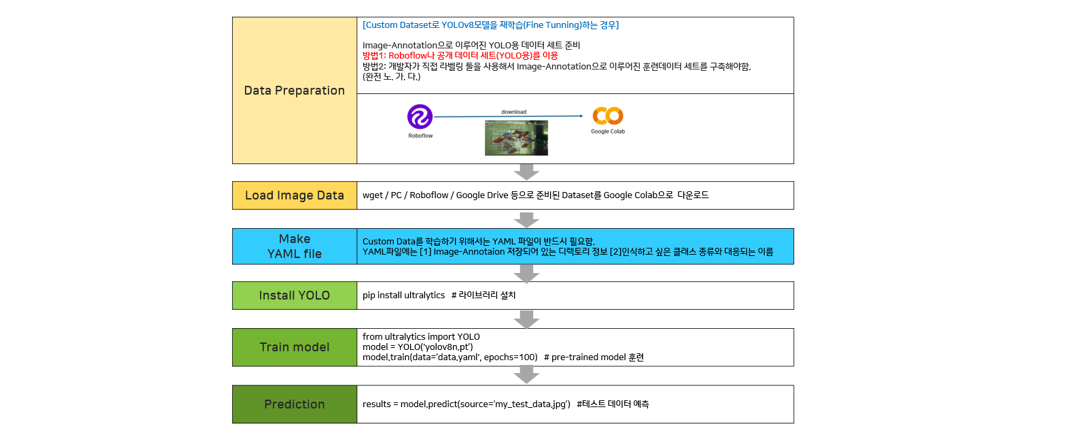

# 데이터세트 업로드

images_split.zip 파일을 /content 위치에 drag&drop하여 업로드한다.

In [ ]:
%pwd

/content


In [1]:
!unzip /content/images_split.zip -d dataset/

Archive:  /content/images_split.zip
   creating: dataset/test/
   creating: dataset/train/
   creating: dataset/val/
  inflating: dataset/data.yaml       
   creating: dataset/train/images/
   creating: dataset/train/labels/
  inflating: dataset/train/labels/test_img_14.txt  
  inflating: dataset/train/labels/test_img_25.txt  
  inflating: dataset/train/labels/test_img_15.txt  
  inflating: dataset/train/labels/test_img_21.txt  
  inflating: dataset/train/labels/test_img_4.txt  
  inflating: dataset/train/labels/test_img_20.txt  
  inflating: dataset/train/labels/test_img_32.txt  
  inflating: dataset/train/labels/test_img_27.txt  
  inflating: dataset/train/labels/test_img_5.txt  
  inflating: dataset/train/labels/test_img_31.txt  
  inflating: dataset/train/labels/test_img_23.txt  
  inflating: dataset/train/labels/test_img_12.txt  
  inflating: dataset/train/labels/test_img_2.txt  
  inflating: dataset/train/labels/test_img_10.txt  
  inflating: dataset/train/labels/test_img_30.txt 

# yaml 파일 설정
* 데이터셋 위치 알려주는 config file

In [2]:
%cat /content/dataset/data.yaml

names: [0]
nc: 1
test: /home/mi/rokey_ws/src/yolov8_ros/yolov8_ros/images_split/test
train: /home/mi/rokey_ws/src/yolov8_ros/yolov8_ros/images_split/train
val: /home/mi/rokey_ws/src/yolov8_ros/yolov8_ros/images_split/val


```
* train,val,test 경로가 나의 작업 환경과 맞지 않아 수정이 필요

* nc: name of class 객체 인식할 클래수 개수

* name: 클래스 이름


```

### custom data에 대한 yaml 파일 만들기

In [ ]:
%pip install PyYAML # 파이썬에서 YAML 파일을 사용하기 위한 라이브러리

In [3]:
# train:에는 학습 이미지 절대경로
# val:에는 검증 이미지 절대경로
# nc:는 클래스 수 (여기서는 예시로 1개)
# names:는 클래스 이름

import yaml

data = { 'train' : '/content/dataset/train/images/',
         'val' : '/content/dataset/val/images/',
         'test' : '/content/dataset/test/images/',
         'names' : ['car'],
         'nc' : 1 } #detection 하고 싶은 클래스 개수

with open('/content/dataset/data.yaml', 'w') as f:  #저장
  yaml.dump(data, f)


In [4]:
!cat /content/dataset/data.yaml

names:
- car
nc: 1
test: /content/dataset/test/images/
train: /content/dataset/train/images/
val: /content/dataset/val/images/


# YOLOv8 설치

*  https://github.com/ultralytics/ultralytics

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [8]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


# Train (Python version)

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # 사전 학습된 yolov8 나노 버전 모델 다운

# 다른 버전도 다운 받아서 시도.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


In [7]:
print(type(model.names), len(model.names))

print(model.names) # MS COCO에서 정의된 클래스 개수와 종류 확인할 수 있음.(총 80개)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [23]:
# /content/runs/이하의 폴더를 지우고 싶다면...

# !rm -rf /content/runs/

In [24]:
#훈련데이터 있는 위치 알려줌
#imgsz = 학습을 위한 목표 이미지 크기입니다.
#모든 이미지는 모델에 입력되기 전에 이 크기로 조정됩니다.
#모델 정확도와 계산 복잡도에 영향을 줍니다.

from ultralytics import YOLO

# 사전 학습된 모델 불러오기
model = YOLO('yolov8n.pt')  # yolov8n: Nano 모델 (가볍고 빠름)

# 학습 시작
model.train(
    data='/content/dataset/data.yaml',  # 아까 만든 data.yaml 파일
    epochs=10,         # 학습 횟수 (조정 가능)
    imgsz=640,         # 입력 이미지 크기 (640 권장)
    batch=16,          # 배치 사이즈 (GPU 메모리에 따라 조정)
    patience=20,       # 조기 종료 기준 (val loss 향상 없을 때)
    name='train',  # 결과 저장 폴더 이름
    pretrained=True,    # COCO 사전학습된 가중치로 초기화
    augment=True          # 데이터 증강 활성화
)



Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=10, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

train: Scanning /content/dataset/train/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 381.3±218.4 MB/s, size: 18.0 KB)


val: Scanning /content/dataset/val/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.2G      1.316      4.269      1.051         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all          9          9    0.00333          1    0.00927     0.0033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.2G      1.323      4.312      1.071         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all          9          9    0.00333          1     0.0114    0.00374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.2G      1.345      4.393      1.052         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all          9          9    0.00333          1      0.208      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.2G      1.169      3.948     0.9831         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all          9          9    0.00333          1      0.494       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.2G     0.9992      3.588     0.8796         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all          9          9    0.00333          1      0.995      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.2G      1.049      3.127     0.8844         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all          9          9    0.00333          1      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.2G      1.171      2.775     0.9188         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all          9          9    0.00333          1      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.2G     0.9183      2.455     0.8287         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          9          9    0.00333          1      0.995      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.2G      1.067       2.16     0.9403         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


                   all          9          9    0.00333          1      0.995      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.2G      1.043      2.303     0.9079         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all          9          9    0.00333          1      0.995      0.456



10 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all          9          9    0.00333          1      0.968      0.725
Speed: 0.2ms preprocess, 8.7ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9fb2102c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

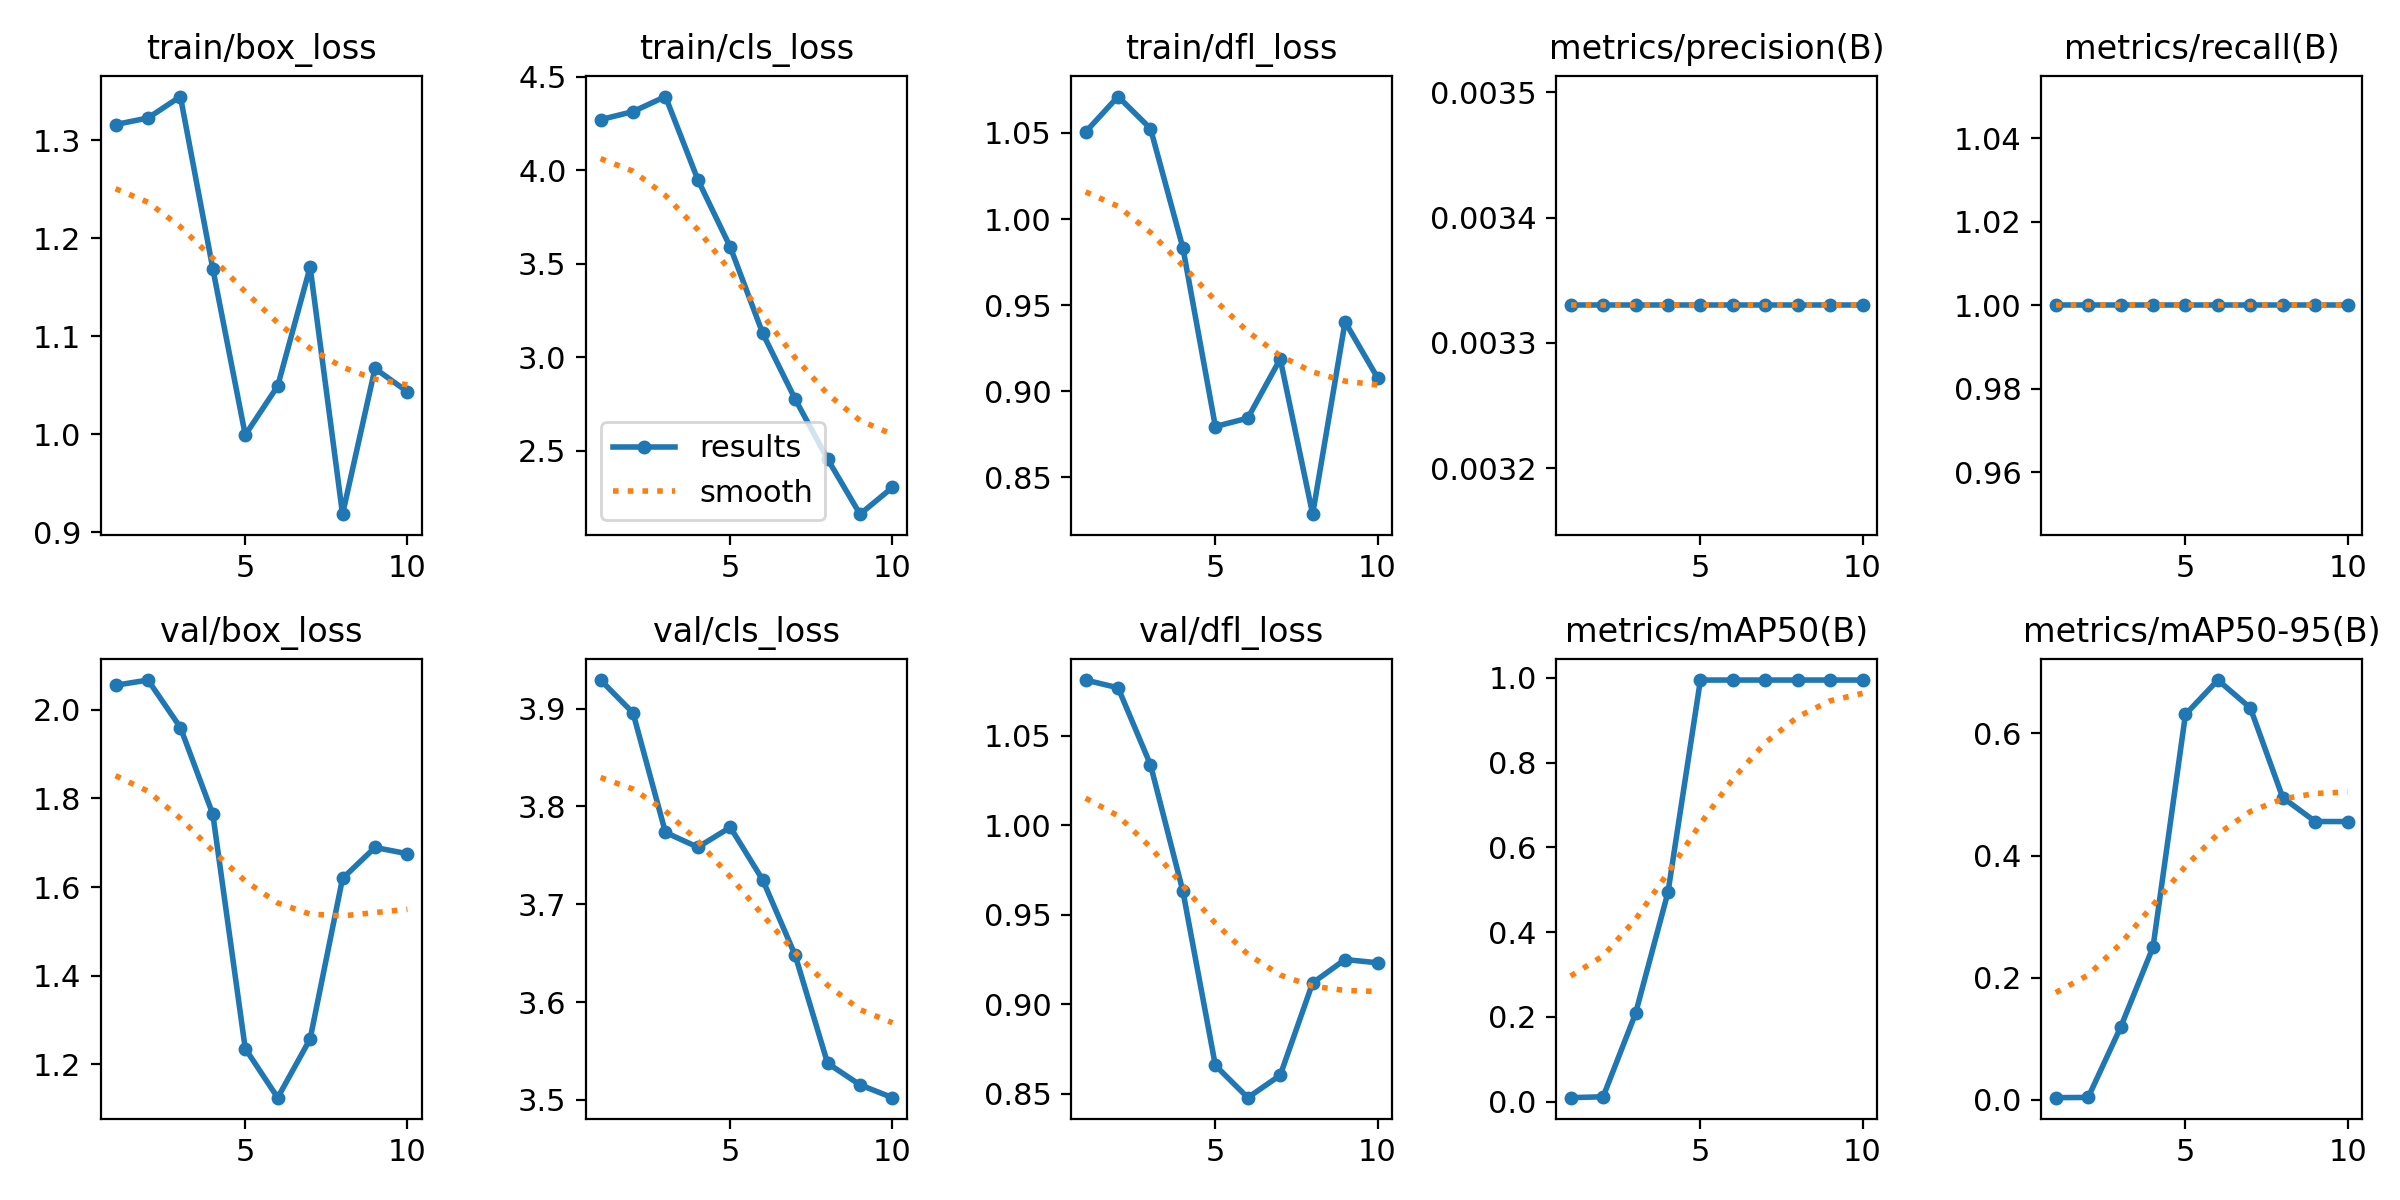

In [25]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train/results.png', width=1000)

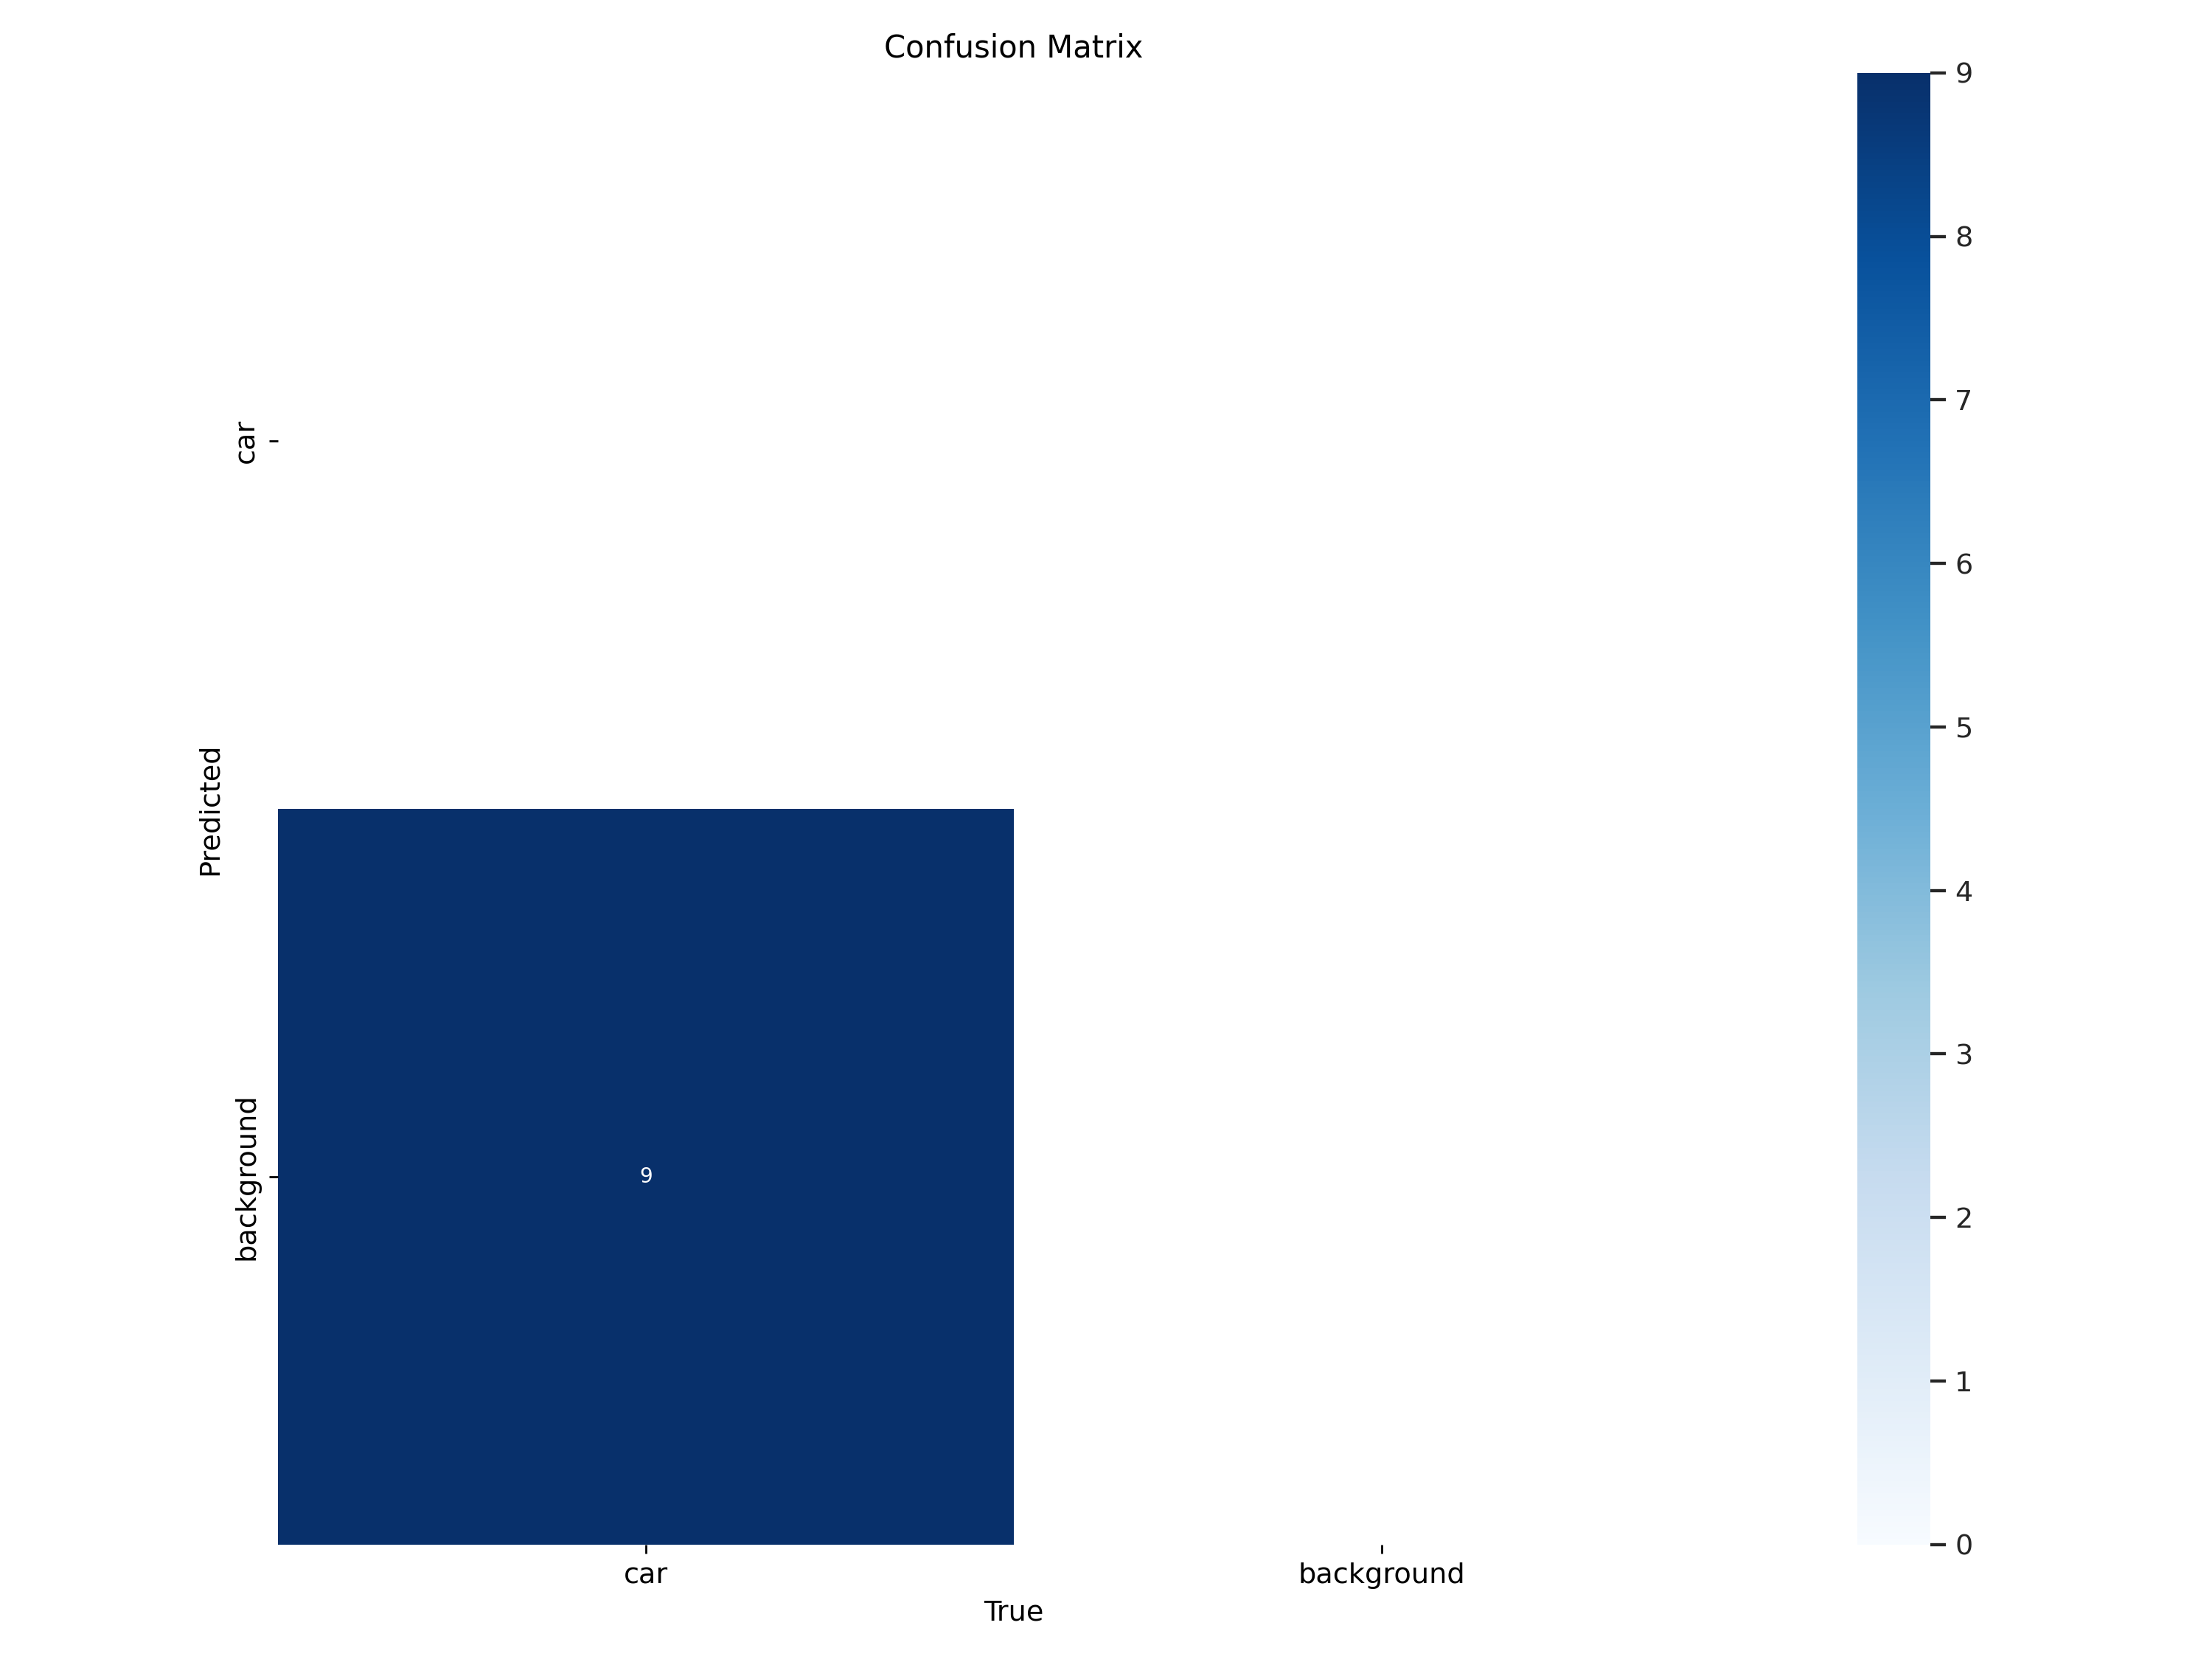

In [26]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

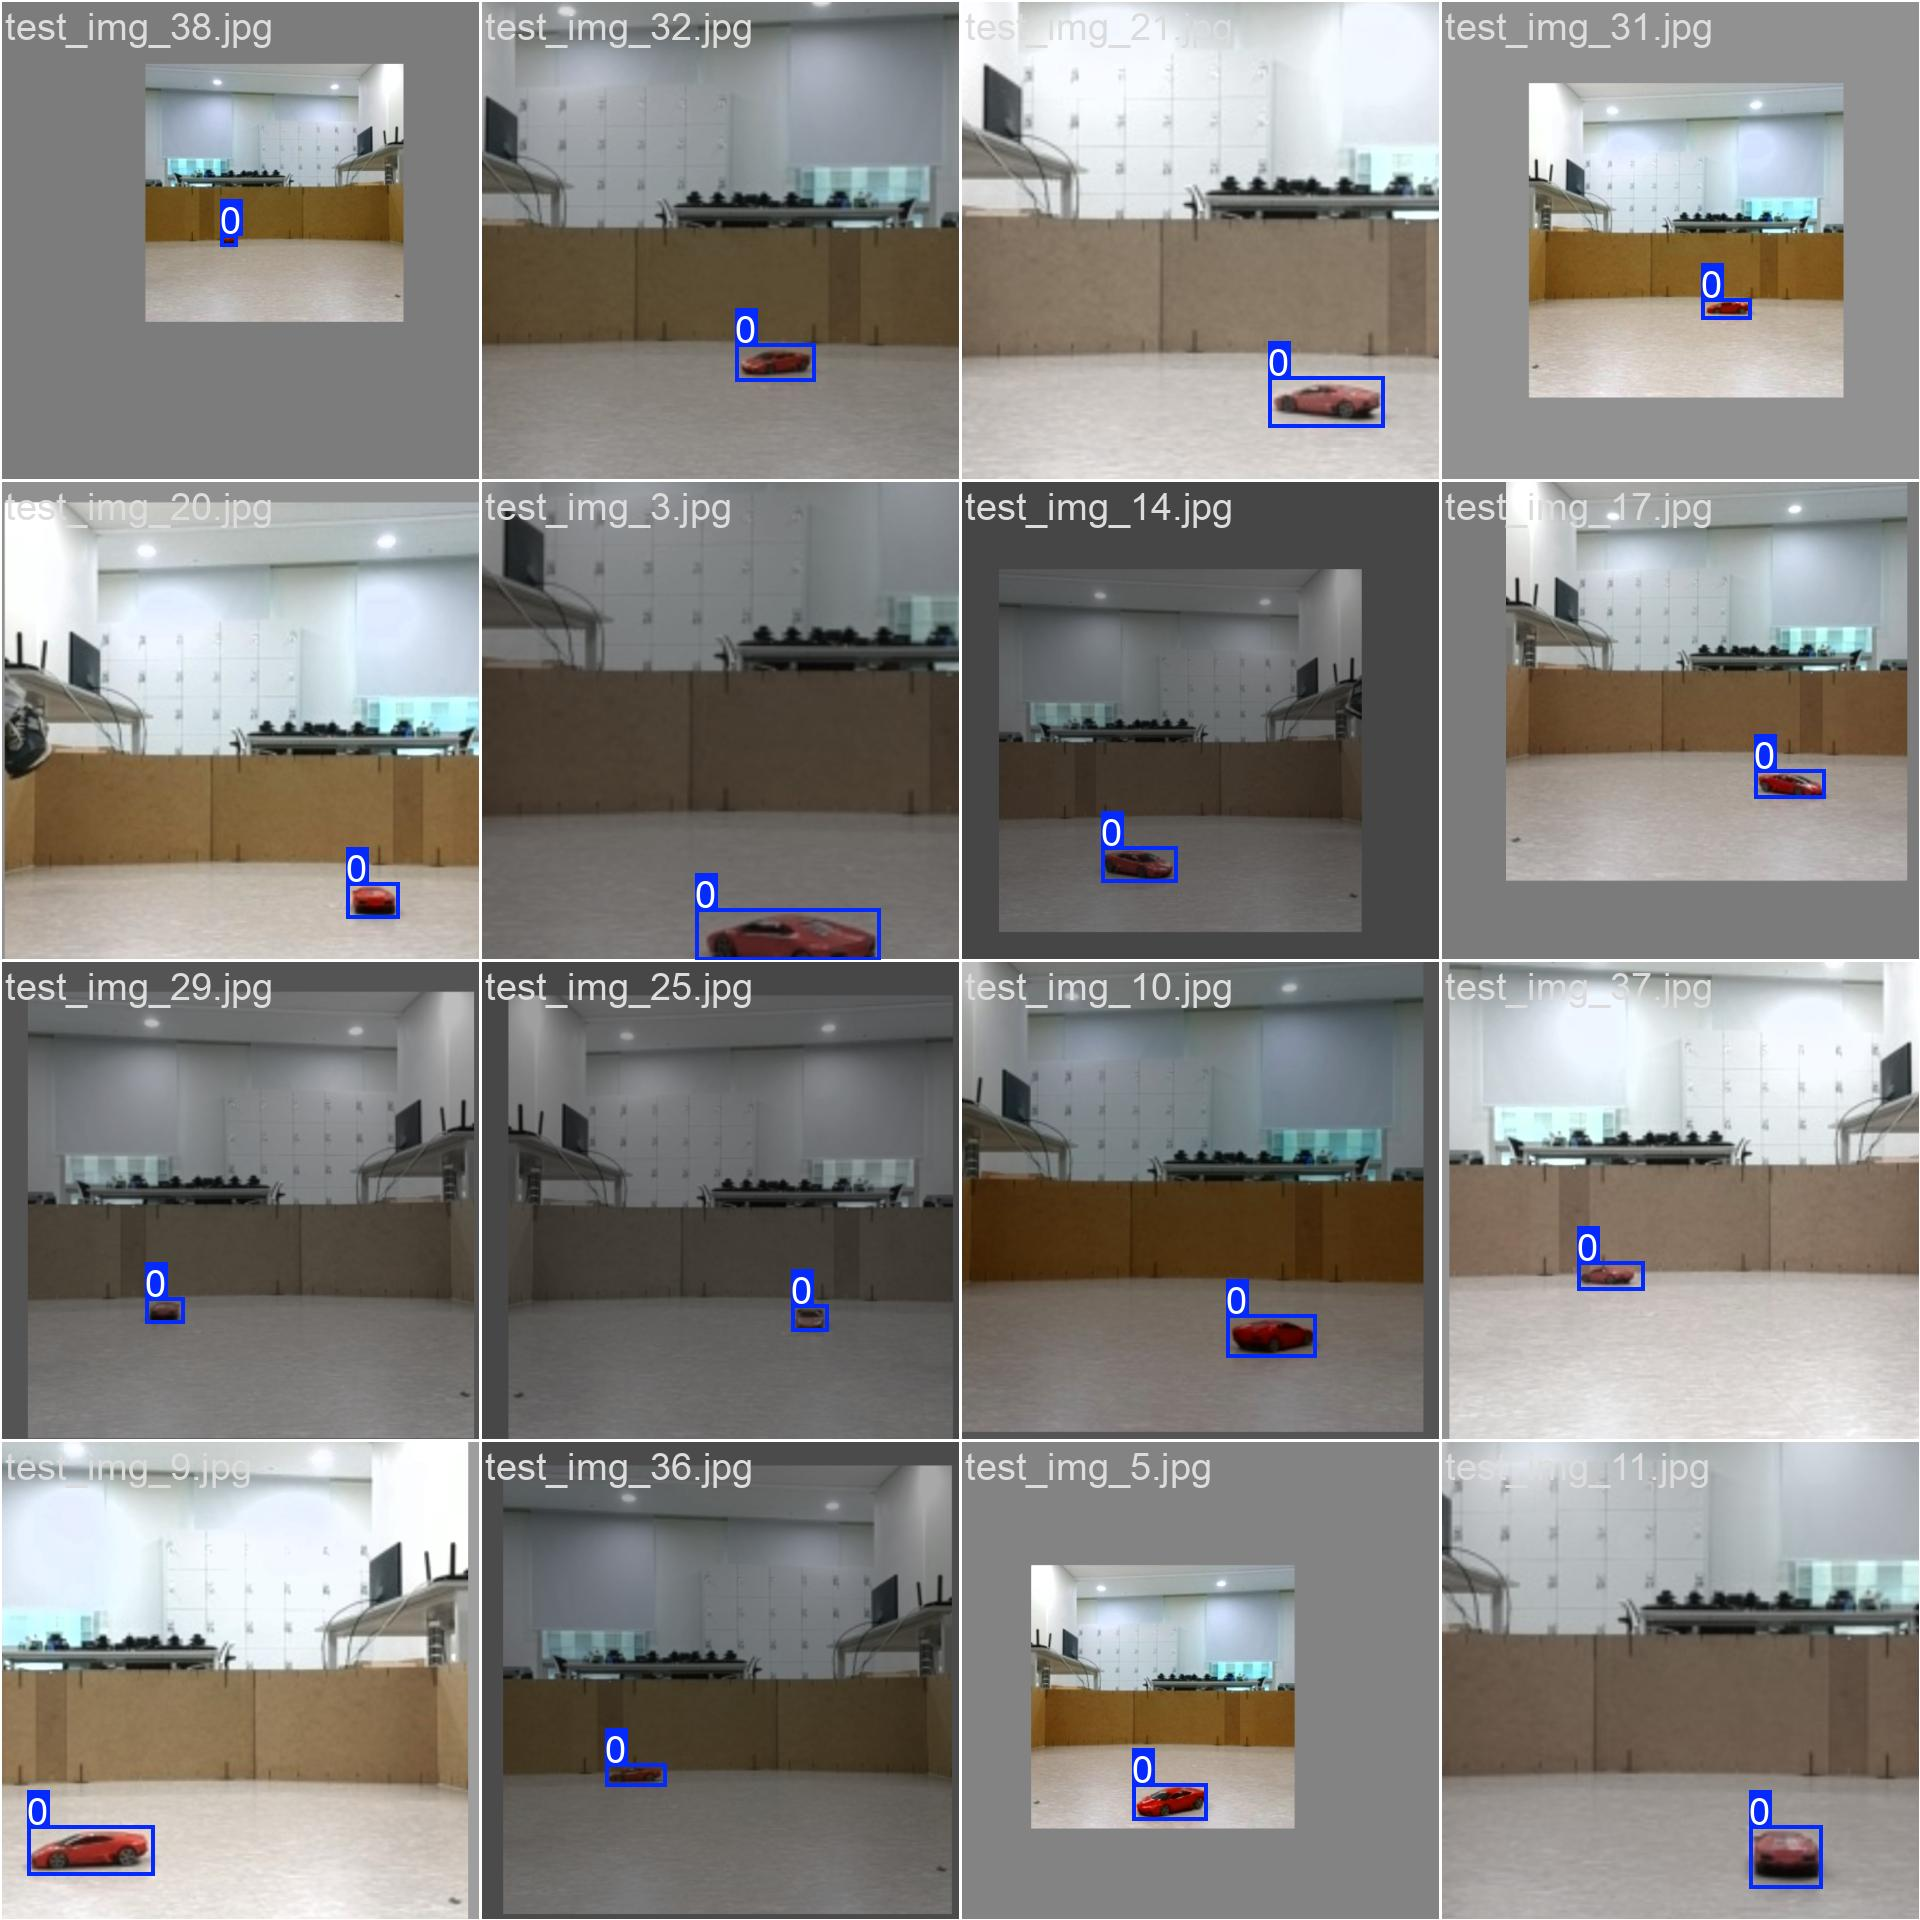

In [27]:
Image(filename='/content/runs/detect/train/train_batch0.jpg', width=600)

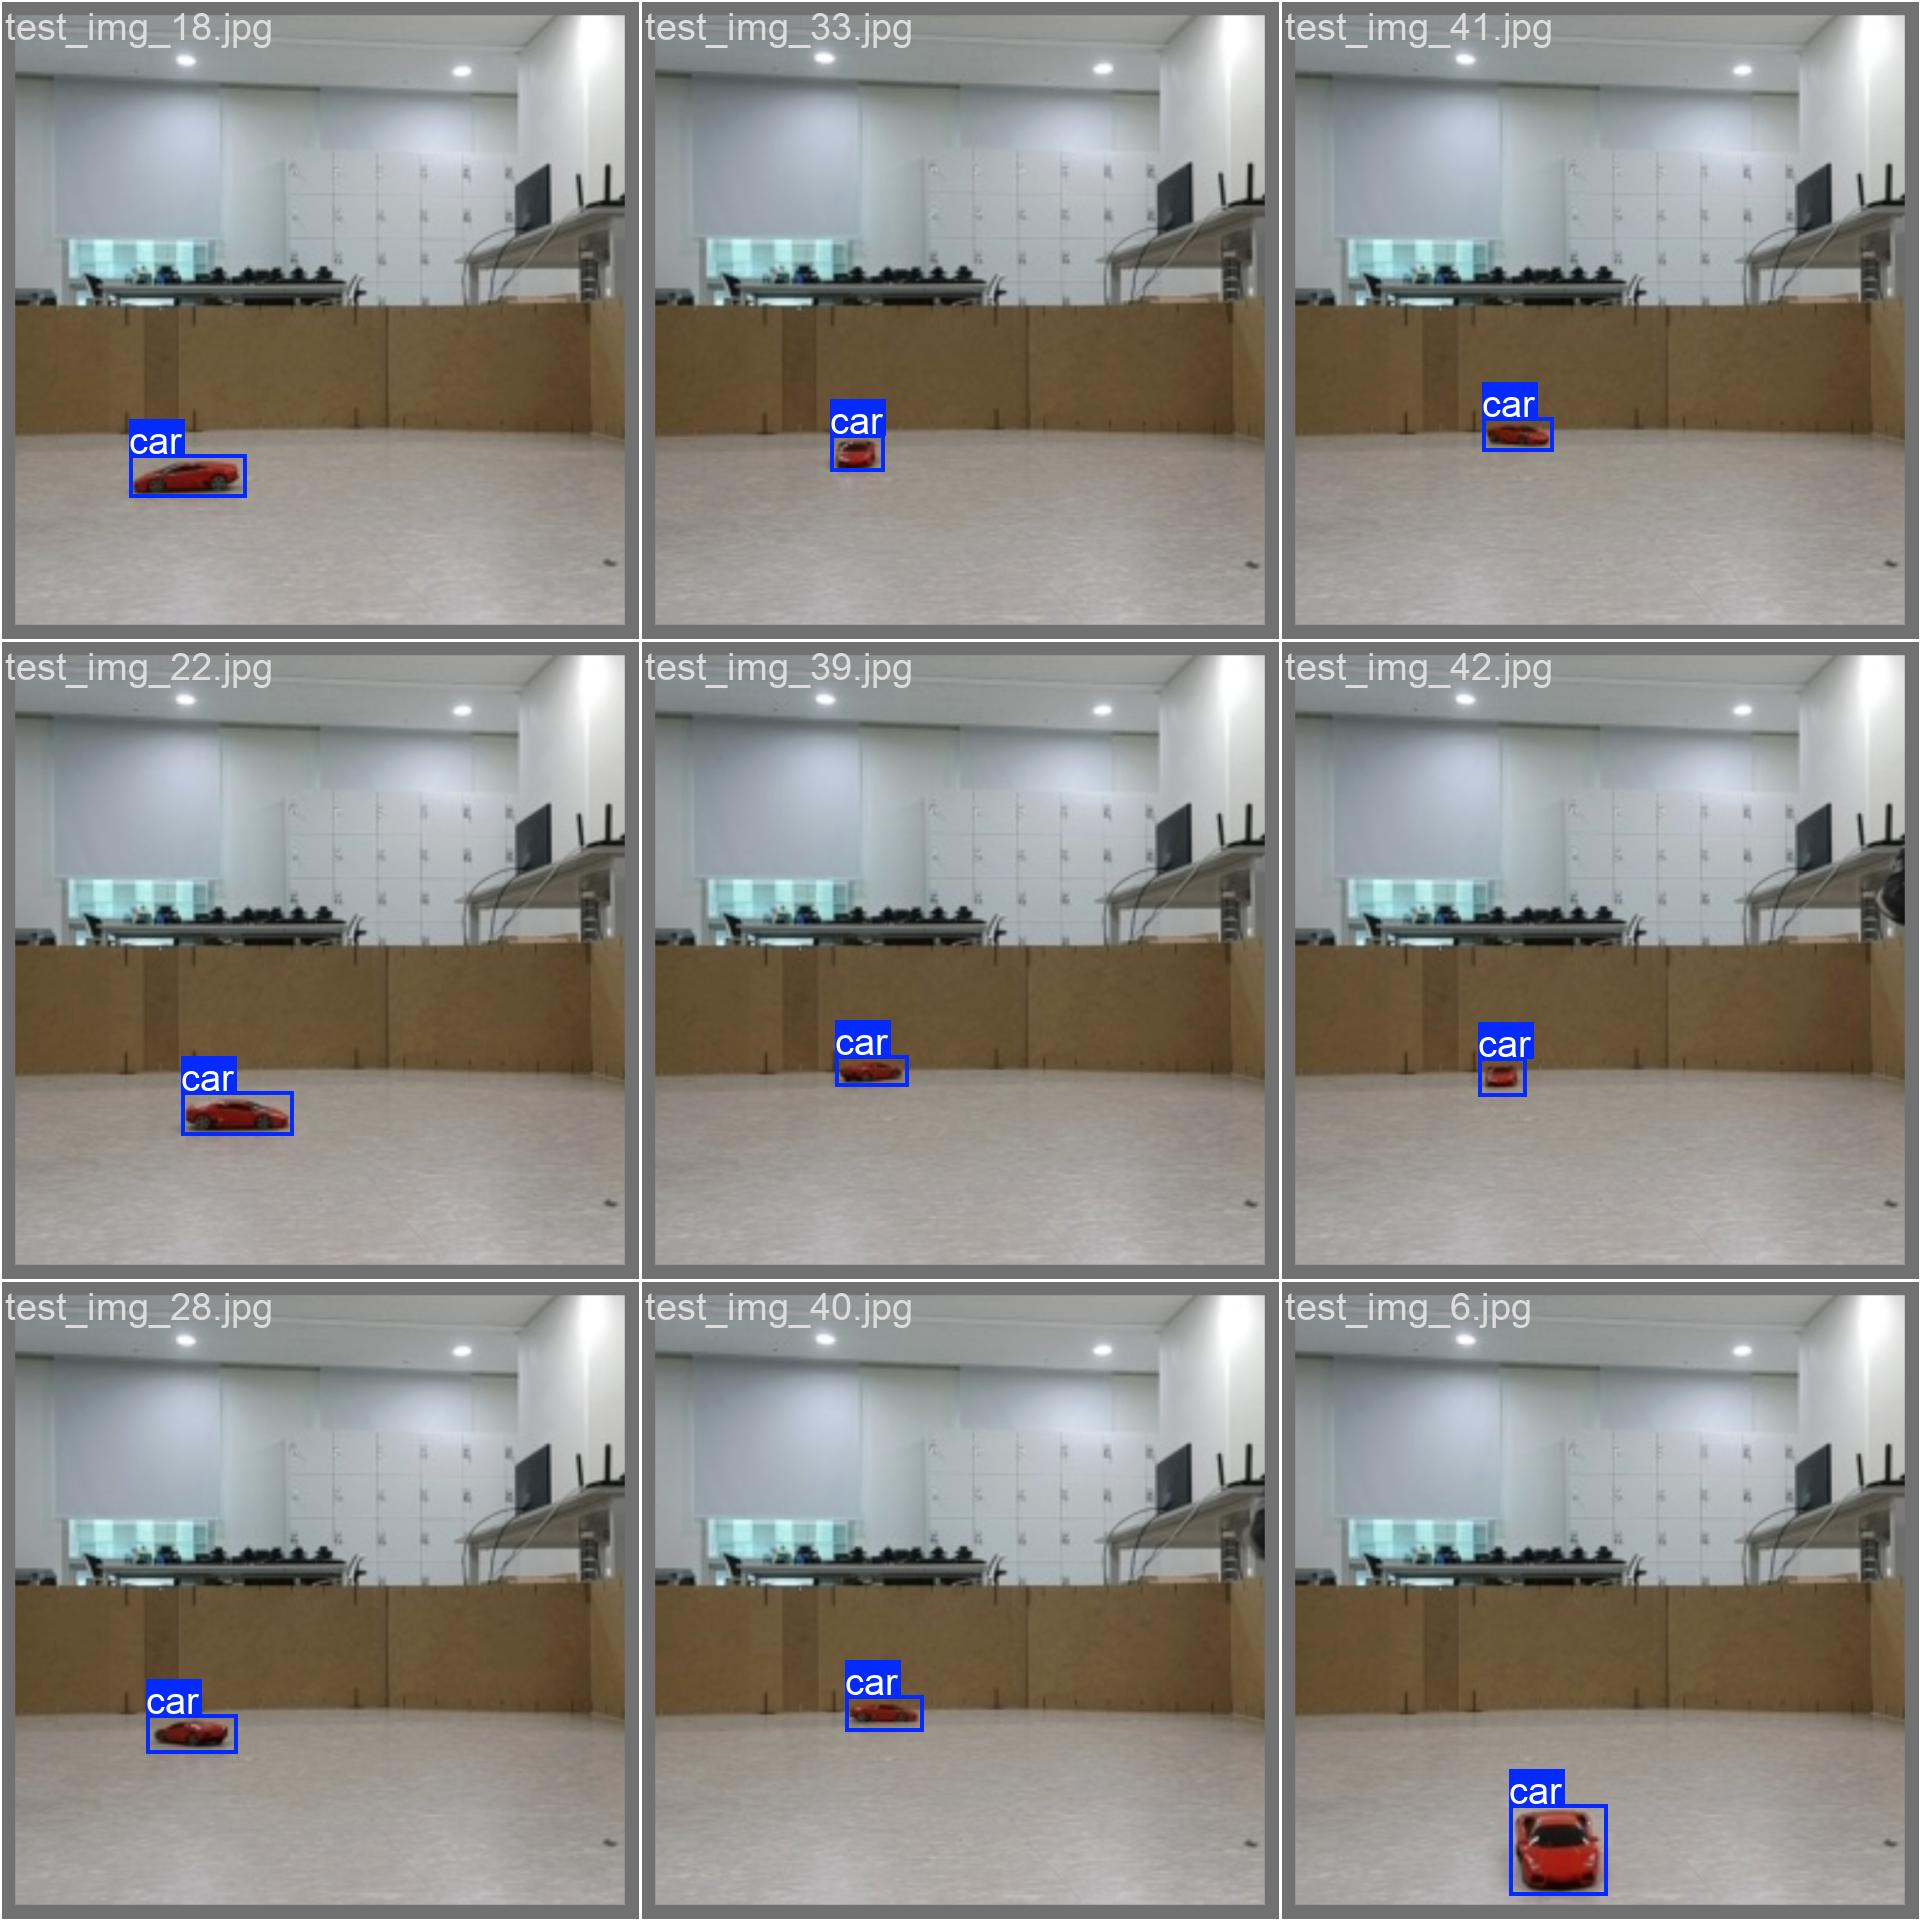

In [28]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=600)

```
train 과정중에 loss, accuracy 등의 graph 데이터는 runs/detect/train/ 에 있는 results.csv 와 results.png 통해서 확인가능하다
```

# Custom Model Inference Test

In [38]:
!rm -rf /content/runs/detect/predict

In [40]:
# model = YOLO('/content/runs/detect/train/weights/best.pt')
model = YOLO('/content/runs/detect/train/weights/best.pt')


In [30]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 1
{0: 'car'}


# 테스트 이미지 데이터 생성 및 확인

In [31]:
# 테스트 이미지

from glob import glob

test_image_list = glob('/content/dataset/test/images/*')

print(len(test_image_list))

test_image_list.sort()

for i in range(len(test_image_list)):

    print('i = ',i, test_image_list[i])

4
i =  0 /content/dataset/test/images/test_img_0.jpg
i =  1 /content/dataset/test/images/test_img_1.jpg
i =  2 /content/dataset/test/images/test_img_35.jpg
i =  3 /content/dataset/test/images/test_img_8.jpg


# 이미지내의 객체 검출 (Inference)

In [42]:
results = model.predict(source='/content/dataset/test/images/', save=True, conf=0.1)


image 1/4 /content/dataset/test/images/test_img_0.jpg: 640x640 (no detections), 11.2ms
image 2/4 /content/dataset/test/images/test_img_1.jpg: 640x640 (no detections), 7.4ms
image 3/4 /content/dataset/test/images/test_img_35.jpg: 640x640 (no detections), 7.4ms
image 4/4 /content/dataset/test/images/test_img_8.jpg: 640x640 (no detections), 8.1ms
Speed: 2.8ms preprocess, 8.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [36]:
print(type(results), len(results))

<class 'list'> 9


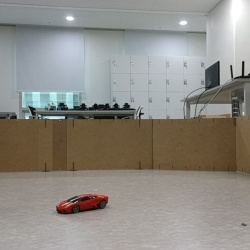

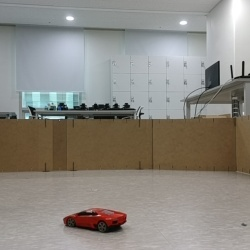

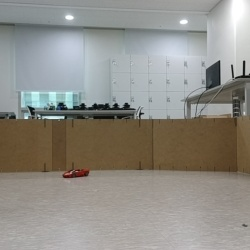

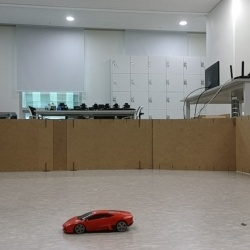

In [43]:
import cv2
from google.colab.patches import cv2_imshow

image_paths = glob('/content/runs/detect/predict/*.jpg')

for image_path in image_paths:
    img = cv2.imread(image_path)
    cv2_imshow(img)

# 다운로드

In [ ]:
from google.colab import files

# 다운로드할 파일 경로
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>